### Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [4]:
# load .csv file and list first 5 rows
data = pd.read_csv("../data/test.csv")
data.head()

,submission_id,topic,difficulty_1to5,steps_count,steps_completeness,reasoning_quality,method_appropriateness,representation_use,explanation_clarity,units_handling,...,language_quality,computational_errors,conceptual_errors,correctness_pct,time_minutes,external_aid_suspected,originality_score,rubric_points,grade,teacher_comment_sv
0,1.0,Funktioner,3,11,0.675,0.850,0.251,0.741,0.304,0.792,...,0.692,2,0,74.0,42,0.465,0.532,46.5,F,Väl förklarat och lätt att följa.
1,2.0,Geometri,4,6,0.901,0.922,0.867,0.901,0.845,0.319,...,0.696,3,1,78.4,49,0.080,0.672,57.5,E,God förståelse för begreppen men otydliga enhe...
2,3.0,Funktioner,3,5,0.429,0.730,0.429,0.685,0.591,0.488,...,0.542,2,1,56.2,42,0.399,0.572,36.2,F,Väl valda representationer (diagram/tabell) so...
3,4.0,Statistik & Sannolikhet,3,7,0.746,0.739,0.788,0.802,0.572,0.518,...,0.270,0,0,84.8,47,0.608,0.462,54.4,E,Korrekt metod men vissa resonemang behöver för...
4,5.0,Algebra,3,13,0.801,0.876,0.960,0.747,0.862,0.801,...,0.654,1,0,87.3,44,0.504,0.449,63.6,D,Mycket väl strukturerad lösning med tydlig mot...


### Data Cleaning & Pre-processing

##### Dealing with Missing Data

In [5]:
data.isnull().sum()

submission_id             186
topic                       0
difficulty_1to5             0
steps_count                 0
steps_completeness          0
reasoning_quality           0
method_appropriateness      0
representation_use          0
explanation_clarity         0
units_handling              0
edge_case_handling          0
language_quality            0
computational_errors        0
conceptual_errors           0
correctness_pct             0
time_minutes                0
external_aid_suspected      0
originality_score           0
rubric_points               0
grade                       0
teacher_comment_sv        186
dtype: int64

<Axes: >

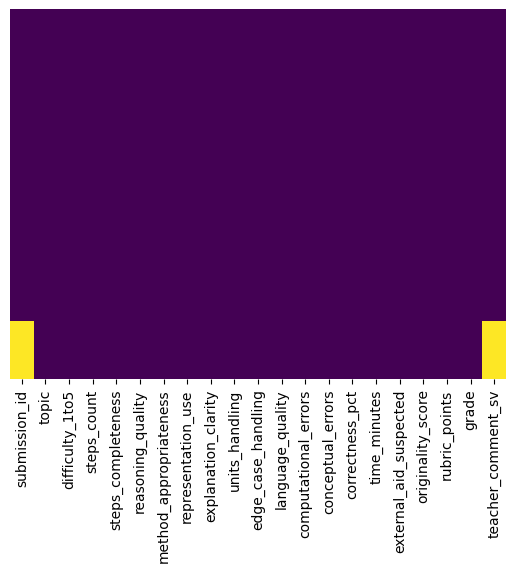

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Exploratory Data Analysis

Betygsfördelning (motsvarar “Survived”)

In [7]:
# Overview of data structure
data.info()

# Quick statistical summary
data.describe()

# Count unique topics (ämnen)
data['topic'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   submission_id           1000 non-null   float64
 1   topic                   1186 non-null   object 
 2   difficulty_1to5         1186 non-null   int64  
 3   steps_count             1186 non-null   int64  
 4   steps_completeness      1186 non-null   float64
 5   reasoning_quality       1186 non-null   float64
 6   method_appropriateness  1186 non-null   float64
 7   representation_use      1186 non-null   float64
 8   explanation_clarity     1186 non-null   float64
 9   units_handling          1186 non-null   float64
 10  edge_case_handling      1186 non-null   float64
 11  language_quality        1186 non-null   float64
 12  computational_errors    1186 non-null   int64  
 13  conceptual_errors       1186 non-null   int64  
 14  correctness_pct         1186 non-null   

topic
Algebra                    263
Geometri                   211
Ekvationer                 161
Funktioner                 152
Procent                    151
Problemlösning             138
Statistik & Sannolikhet    110
Name: count, dtype: int64

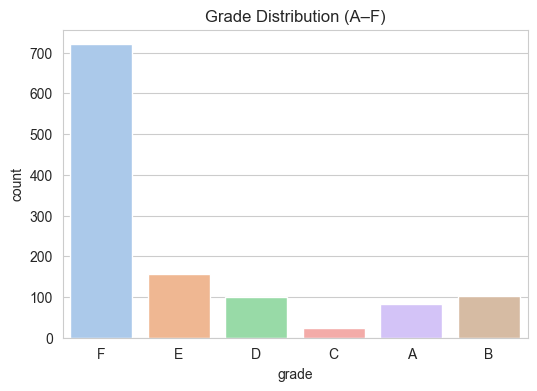

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='grade', hue='grade', data=data, palette='pastel', legend=False)
plt.title('Grade Distribution (A–F)')
plt.show()

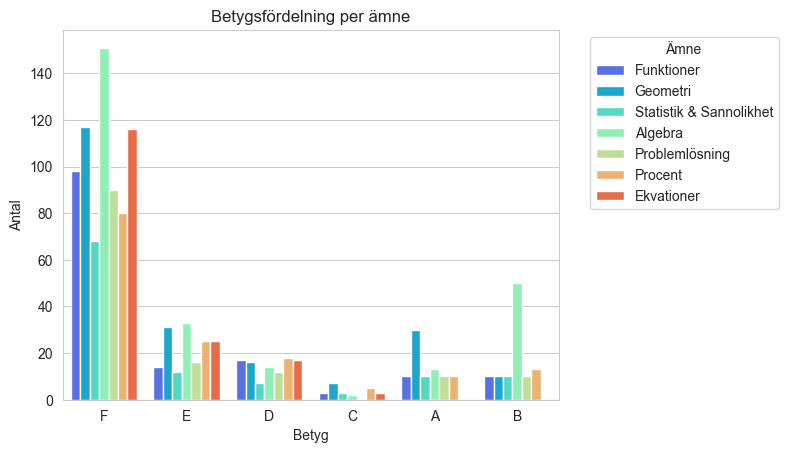

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='grade', hue='topic', data=data, palette='rainbow')
plt.title('Betygsfördelning per ämne')
plt.xlabel('Betyg')
plt.ylabel('Antal')
plt.legend(title='Ämne', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Bonus: Betyg uppdelat efter svårighetsgrad

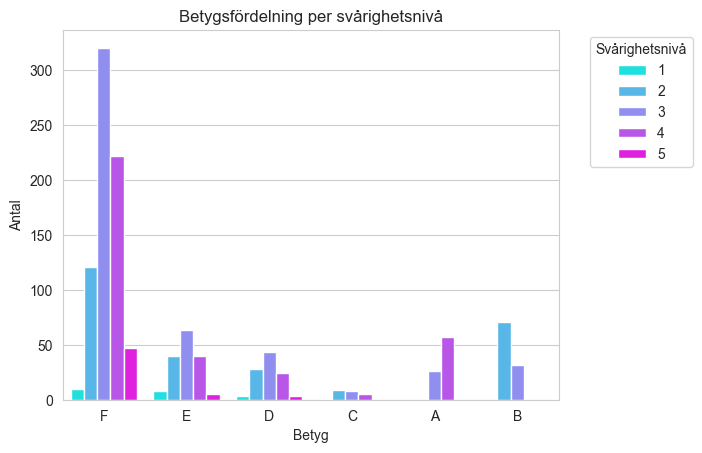

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='grade', hue='difficulty_1to5', data=data, palette='cool')
plt.title('Betygsfördelning per svårighetsnivå')
plt.xlabel('Betyg')
plt.ylabel('Antal')
plt.legend(title='Svårighetsnivå', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Betyg uppdelat per ämne (motsvarar “Pclass”)

###  Data Exploration


Korrekthet mot betyg

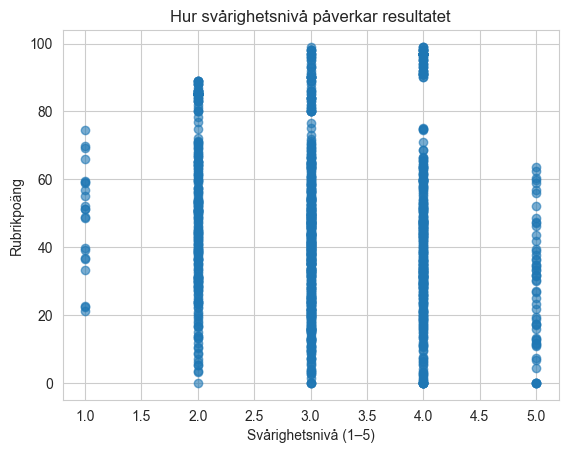

In [11]:
plt.scatter(data['difficulty_1to5'], data['rubric_points'], alpha=0.6)
plt.xlabel("Svårighetsnivå (1–5)")
plt.ylabel("Rubrikpoäng")
plt.title("Hur svårighetsnivå påverkar resultatet")
plt.show()

Svårighetsgrad mot totalpoäng

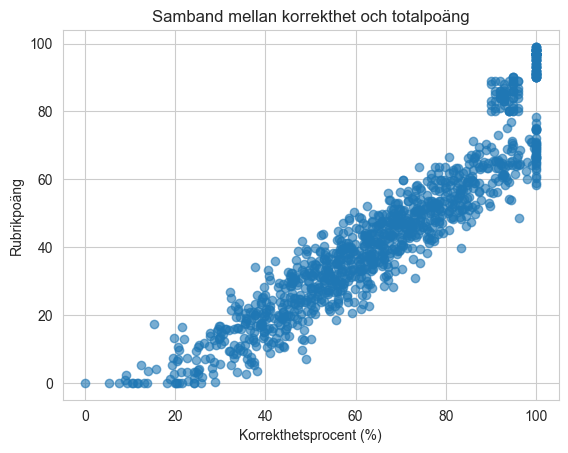

In [13]:
plt.scatter(data['correctness_pct'], data['rubric_points'], alpha=0.6)
plt.xlabel("Korrekthetsprocent (%)")
plt.ylabel("Rubrikpoäng")
plt.title("Samband mellan korrekthet och totalpoäng")
plt.show()

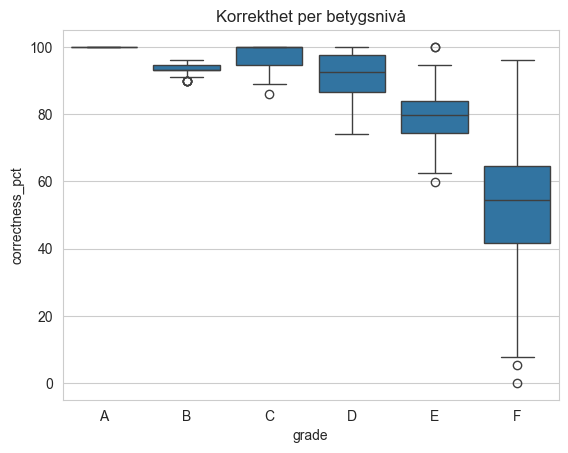

In [14]:
import seaborn as sns

sns.boxplot(x='grade', y='correctness_pct', data=data, order=sorted(data['grade'].unique()))
plt.title("Korrekthet per betygsnivå")
plt.show()

### d) Data Extraction

In [15]:
import pandas as pd

# Läs tränings- och testdata
train = pd.read_csv("../data/klass9_matte_inlamningar_train.csv")
test = pd.read_csv("../data/klass9_matte_inlamningar_test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (800, 21)
Test shape: (200, 21)


In [16]:
train.head()

,submission_id,topic,difficulty_1to5,steps_count,steps_completeness,reasoning_quality,method_appropriateness,representation_use,explanation_clarity,units_handling,...,language_quality,computational_errors,conceptual_errors,correctness_pct,time_minutes,external_aid_suspected,originality_score,rubric_points,grade,teacher_comment_sv
0,600,Procent,2,6,0.741,0.580,0.374,0.228,0.696,0.372,...,0.564,5,2,59.9,45,0.249,0.787,31.4,F,God förståelse för begreppen men otydliga enhe...
1,685,Procent,4,20,0.530,0.872,0.512,0.502,0.815,0.835,...,0.271,0,1,59.7,71,0.465,0.394,50.3,E,Mycket väl strukturerad lösning med tydlig mot...
2,782,Problemlösning,3,13,0.638,0.396,0.723,0.479,0.750,0.501,...,0.473,5,3,52.3,38,0.556,0.518,24.6,F,Metoden passar inte helt för uppgiften; pröva ...
3,868,Funktioner,4,16,0.480,0.517,0.405,0.271,0.469,0.190,...,0.491,2,2,35.5,86,0.676,0.332,20.6,F,Metoden passar inte helt för uppgiften; pröva ...
4,399,Geometri,4,18,0.636,0.424,0.516,0.588,0.554,0.482,...,0.613,1,0,77.0,62,0.709,0.622,50.6,E,Väl förklarat och lätt att följa.


Vill du jämföra mot andra betyg (t.ex. snittvärden)?

Du kan t.ex. se hur A-betyg skiljer sig i “correctness_pct”:

In [17]:
train.groupby("grade")["correctness_pct"].mean().sort_index()

grade
C    97.172222
D    91.483951
E    79.604800
F    52.648785
Name: correctness_pct, dtype: float64

Visa bara C-betyg i träningsdatan


In [18]:
# Filtrera fram bara betyg A
a_grade = train[train["grade"] == "C"]

# Visa de första 5 raderna
a_grade.head()

,submission_id,topic,difficulty_1to5,steps_count,steps_completeness,reasoning_quality,method_appropriateness,representation_use,explanation_clarity,units_handling,...,language_quality,computational_errors,conceptual_errors,correctness_pct,time_minutes,external_aid_suspected,originality_score,rubric_points,grade,teacher_comment_sv
25,49,Statistik & Sannolikhet,2,8,0.897,0.913,0.845,0.728,0.716,0.900,...,0.821,0,1,94.7,43,0.272,0.791,71.2,C,God förståelse för begreppen men otydliga enhe...
150,651,Geometri,2,10,0.960,0.954,0.836,0.489,0.867,0.766,...,0.617,0,0,100.0,46,0.118,0.892,78.3,C,Korrekt metod men vissa resonemang behöver för...
229,53,Funktioner,4,19,0.856,0.941,0.952,0.524,0.719,0.511,...,0.930,1,0,99.2,44,0.419,0.906,70.9,C,Metoden passar inte helt för uppgiften; pröva ...
237,521,Funktioner,2,5,0.935,0.940,0.687,0.765,0.888,0.910,...,0.562,0,1,100.0,25,0.131,0.766,74.9,C,Bra ansats men flera konceptuella missförstånd...
317,212,Procent,3,8,0.929,0.906,0.698,0.763,0.866,0.790,...,0.601,0,1,98.5,48,0.070,0.411,71.8,C,Bra ansats men flera konceptuella missförstånd...


In [19]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   submission_id           800 non-null    int64  
 1   topic                   800 non-null    object 
 2   difficulty_1to5         800 non-null    int64  
 3   steps_count             800 non-null    int64  
 4   steps_completeness      800 non-null    float64
 5   reasoning_quality       800 non-null    float64
 6   method_appropriateness  800 non-null    float64
 7   representation_use      800 non-null    float64
 8   explanation_clarity     800 non-null    float64
 9   units_handling          800 non-null    float64
 10  edge_case_handling      800 non-null    float64
 11  language_quality        800 non-null    float64
 12  computational_errors    800 non-null    int64  
 13  conceptual_errors       800 non-null    int64  
 14  correctness_pct         800 non-null    fl

submission_id             0
topic                     0
difficulty_1to5           0
steps_count               0
steps_completeness        0
reasoning_quality         0
method_appropriateness    0
representation_use        0
explanation_clarity       0
units_handling            0
edge_case_handling        0
language_quality          0
computational_errors      0
conceptual_errors         0
correctness_pct           0
time_minutes              0
external_aid_suspected    0
originality_score         0
rubric_points             0
grade                     0
teacher_comment_sv        0
dtype: int64

In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
submission_id,800.0,506.035000,289.648898,1.000,256.75000,506.5000,757.50000,1000.000
difficulty_1to5,800.0,3.143750,0.895314,1.000,3.00000,3.0000,4.00000,5.000
steps_count,800.0,10.846250,4.816545,1.000,7.00000,10.0000,14.00000,20.000
steps_completeness,800.0,0.613314,0.188375,0.096,0.47200,0.6280,0.75400,0.991
reasoning_quality,800.0,0.583951,0.218055,0.037,0.41575,0.6065,0.75600,0.972
method_appropriateness,800.0,0.500634,0.216176,0.051,0.34400,0.4980,0.67075,0.960
representation_use,800.0,0.496457,0.191954,0.064,0.36100,0.4895,0.64125,0.946
explanation_clarity,800.0,0.508851,0.215622,0.025,0.33950,0.5140,0.68550,0.946
units_handling,800.0,0.494770,0.187083,0.065,0.35300,0.4910,0.63725,0.935
edge_case_handling,800.0,0.494580,0.200991,0.042,0.33300,0.4820,0.65725,0.966


In [21]:
print("Kolumner i datasetet:")
for col in train.columns:
    print(" -", col)

Kolumner i datasetet:
 - submission_id
 - topic
 - difficulty_1to5
 - steps_count
 - steps_completeness
 - reasoning_quality
 - method_appropriateness
 - representation_use
 - explanation_clarity
 - units_handling
 - edge_case_handling
 - language_quality
 - computational_errors
 - conceptual_errors
 - correctness_pct
 - time_minutes
 - external_aid_suspected
 - originality_score
 - rubric_points
 - grade
 - teacher_comment_sv


In [22]:
train['grade'].value_counts()

grade
F    576
E    125
D     81
C     18
Name: count, dtype: int64

In [23]:
train_clean = train.copy()
train_clean.to_csv("../data/train_clean.csv", index=False)

In [24]:
# Målvariabel (grade)
y = data["grade"]

# Features (ta bort kolumner som inte används)
X = data.drop(columns=["submission_id", "grade", "teacher_comment_sv"])

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X["topic"] = label_encoder.fit_transform(X["topic"])

In [26]:
#print("Train:", X_train.shape, y_train.shape)
#print("Val:", X_val.shape, y_val.shape)
#print("\nBetygsfördelning:")
#print("Train:\n", y_train.value_counts(normalize=True))
#print("Val:\n", y_val.value_counts(normalize=True))


Ladda data

In [27]:
model_data = pd.read_csv("../data/klass9_matte_inlamningar_train.csv")
print("Antal rader:", len(model_data))
model_data.head()

Antal rader: 800


,submission_id,topic,difficulty_1to5,steps_count,steps_completeness,reasoning_quality,method_appropriateness,representation_use,explanation_clarity,units_handling,...,language_quality,computational_errors,conceptual_errors,correctness_pct,time_minutes,external_aid_suspected,originality_score,rubric_points,grade,teacher_comment_sv
0,600,Procent,2,6,0.741,0.580,0.374,0.228,0.696,0.372,...,0.564,5,2,59.9,45,0.249,0.787,31.4,F,God förståelse för begreppen men otydliga enhe...
1,685,Procent,4,20,0.530,0.872,0.512,0.502,0.815,0.835,...,0.271,0,1,59.7,71,0.465,0.394,50.3,E,Mycket väl strukturerad lösning med tydlig mot...
2,782,Problemlösning,3,13,0.638,0.396,0.723,0.479,0.750,0.501,...,0.473,5,3,52.3,38,0.556,0.518,24.6,F,Metoden passar inte helt för uppgiften; pröva ...
3,868,Funktioner,4,16,0.480,0.517,0.405,0.271,0.469,0.190,...,0.491,2,2,35.5,86,0.676,0.332,20.6,F,Metoden passar inte helt för uppgiften; pröva ...
4,399,Geometri,4,18,0.636,0.424,0.516,0.588,0.554,0.482,...,0.613,1,0,77.0,62,0.709,0.622,50.6,E,Väl förklarat och lätt att följa.


Förbered features och mål

In [28]:
# Målvariabel (grade)
y = model_data["grade"]

# Features (ta bort kolumner som inte används)
X = model_data.drop(columns=["submission_id", "grade", "teacher_comment_sv"])

Hantera kategorier (topic)

In [29]:
label_encoder = LabelEncoder()
X["topic"] = label_encoder.fit_transform(X["topic"])

Dela upp i train/test (internt)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Importera och skapa LabelEncoder för y

In [31]:
from sklearn.preprocessing import LabelEncoder

# Skapa en label encoder för betyg
grade_encoder = LabelEncoder()

# Passa och transformera
y_encoded = grade_encoder.fit_transform(y)

Dela upp datan igen

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Träna modellen som vanligt

In [33]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Tolka prediktionerna tillbaka till bokstäver

In [34]:
y_pred = model.predict(X_val)

# Omvandla siffrorna tillbaka till bokstäver
y_pred_labels = grade_encoder.inverse_transform(y_pred)

Kontrollera mappings

In [35]:
dict(zip(grade_encoder.classes_, grade_encoder.transform(grade_encoder.classes_)))

{'C': np.int64(0), 'D': np.int64(1), 'E': np.int64(2), 'F': np.int64(3)}

Bygg och träna modellen (XGBoost)

In [36]:
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Utvärdera modellen

📘 Klassificeringsrapport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16
           2       0.96      1.00      0.98        25
           3       1.00      0.99      1.00       115

    accuracy                           0.99       160
   macro avg       0.99      1.00      0.99       160
weighted avg       0.99      0.99      0.99       160



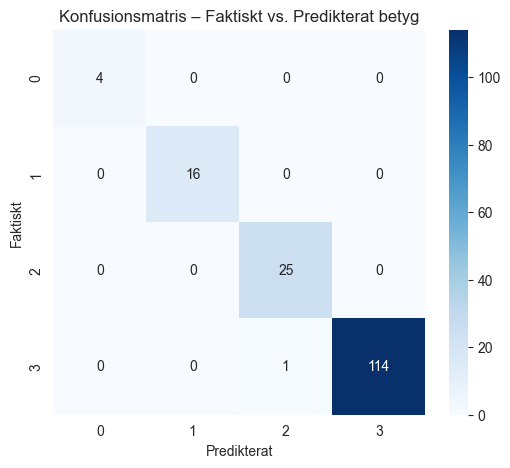

In [37]:
from sklearn.metrics import confusion_matrix, classification_report


# Print report
print("📘 Klassificeringsrapport:")
print(classification_report(y_val, y_pred))

# ✅ Fix: only include labels actually present in y_val or y_pred
valid_labels = sorted(list(set(y_val) | set(y_pred)))

cm = confusion_matrix(y_val, y_pred, labels=valid_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_labels,
            yticklabels=valid_labels)
plt.title("Konfusionsmatris – Faktiskt vs. Predikterat betyg")
plt.xlabel("Predikterat")
plt.ylabel("Faktiskt")
plt.show()

📘 Klassificeringsrapport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16
           2       0.96      1.00      0.98        25
           3       1.00      0.99      1.00       115

    accuracy                           0.99       160
   macro avg       0.99      1.00      0.99       160
weighted avg       0.99      0.99      0.99       160



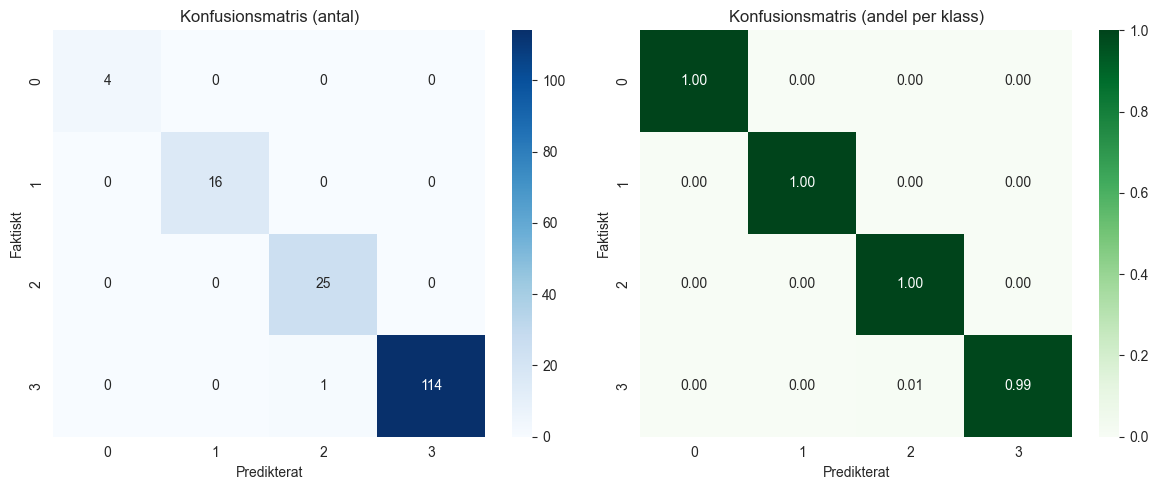

In [38]:
# Print classification report
print("📘 Klassificeringsrapport:")
print(classification_report(y_val, y_pred))

# Use only labels actually present
valid_labels = sorted(list(set(y_val) | set(y_pred)))

# --- Raw Confusion Matrix ---
cm_raw = confusion_matrix(y_val, y_pred, labels=valid_labels)

# --- Normalized (row-wise = per actual class) ---
cm_norm = confusion_matrix(y_val, y_pred, labels=valid_labels, normalize="true")

# --- Plot both ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[0])
axes[0].set_title("Konfusionsmatris (antal)")
axes[0].set_xlabel("Predikterat")
axes[0].set_ylabel("Faktiskt")

sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[1])
axes[1].set_title("Konfusionsmatris (andel per klass)")
axes[1].set_xlabel("Predikterat")
axes[1].set_ylabel("Faktiskt")

plt.tight_layout()
plt.show()

📘 Klassificeringsrapport:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000    4.00000
1              1.000000  1.000000  1.000000   16.00000
2              0.961538  1.000000  0.980392   25.00000
3              1.000000  0.991304  0.995633  115.00000
accuracy       0.993750  0.993750  0.993750    0.99375
macro avg      0.990385  0.997826  0.994006  160.00000
weighted avg   0.993990  0.993750  0.993798  160.00000


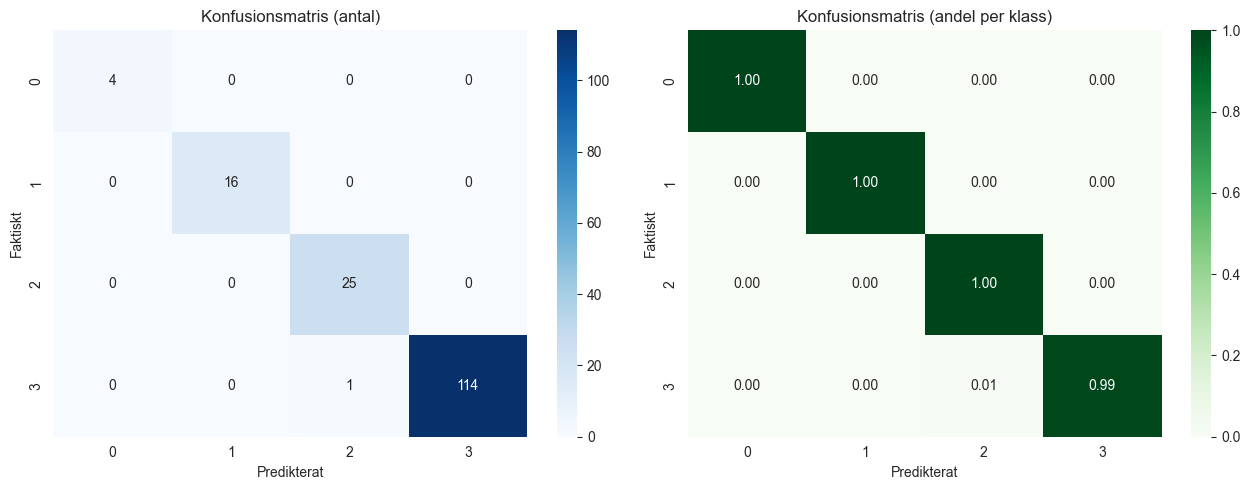

NameError: name 'np' is not defined

<Figure size 1000x500 with 0 Axes>

In [39]:
# --- 1️⃣ Text report ---
print("📘 Klassificeringsrapport:")
report = classification_report(y_val, y_pred, output_dict=True)
print(pd.DataFrame(report).transpose())

# --- Prepare valid labels ---
valid_labels = sorted(list(set(y_val) | set(y_pred)))

# --- 2️⃣ Confusion Matrices ---
cm_raw = confusion_matrix(y_val, y_pred, labels=valid_labels)
cm_norm = confusion_matrix(y_val, y_pred, labels=valid_labels, normalize="true")

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[0])
axes[0].set_title("Konfusionsmatris (antal)")
axes[0].set_xlabel("Predikterat")
axes[0].set_ylabel("Faktiskt")

sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[1])
axes[1].set_title("Konfusionsmatris (andel per klass)")
axes[1].set_xlabel("Predikterat")
axes[1].set_ylabel("Faktiskt")

plt.tight_layout()
plt.show()

# --- 3️⃣ Bar Chart for Precision, Recall, F1 ---
metrics_df = pd.DataFrame(report).transpose().reset_index()
metrics_df = metrics_df[metrics_df['index'].isin(valid_labels)]

plt.figure(figsize=(10, 5))
bar_width = 0.25
x = np.arange(len(metrics_df))

plt.bar(x - bar_width, metrics_df["precision"], width=bar_width, label="Precision", color="skyblue")
plt.bar(x, metrics_df["recall"], width=bar_width, label="Recall", color="lightgreen")
plt.bar(x + bar_width, metrics_df["f1-score"], width=bar_width, label="F1-score", color="salmon")

plt.xticks(x, metrics_df["index"])
plt.xlabel("Betyg (Grade)")
plt.ylabel("Poäng (0–1)")
plt.title("Precision, Recall och F1-score per betyg")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

📘 Klassificeringsrapport:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000    4.00000
1              1.000000  1.000000  1.000000   16.00000
2              0.961538  1.000000  0.980392   25.00000
3              1.000000  0.991304  0.995633  115.00000
accuracy       0.993750  0.993750  0.993750    0.99375
macro avg      0.990385  0.997826  0.994006  160.00000
weighted avg   0.993990  0.993750  0.993798  160.00000
✅ Klassificeringsrapport sparad till: ../reports/classification_report_20251020_092832.csv


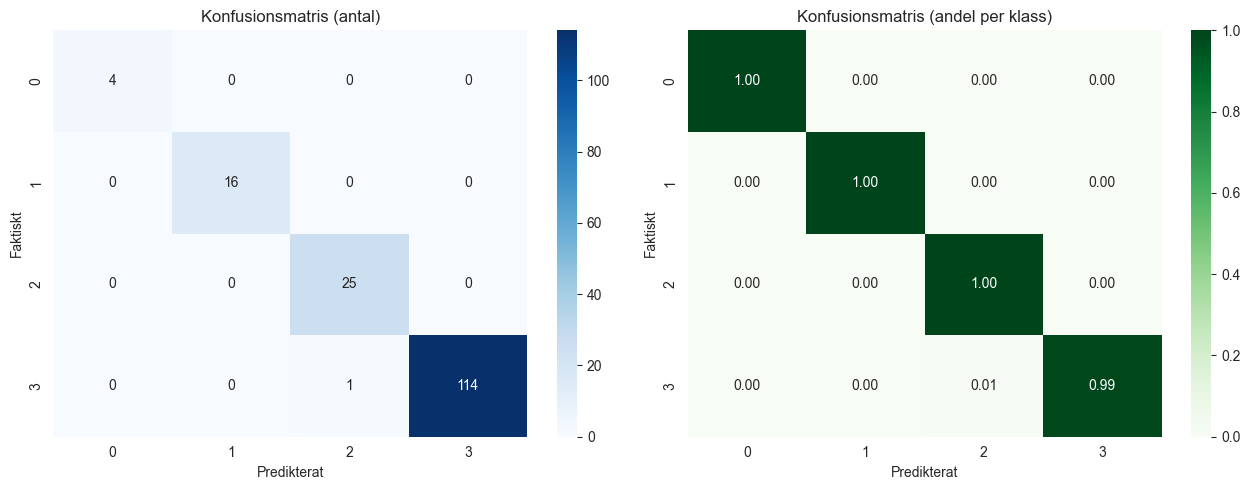

✅ Konfusionsmatriser sparade till: ../reports/confusion_matrices_20251020_092832.png


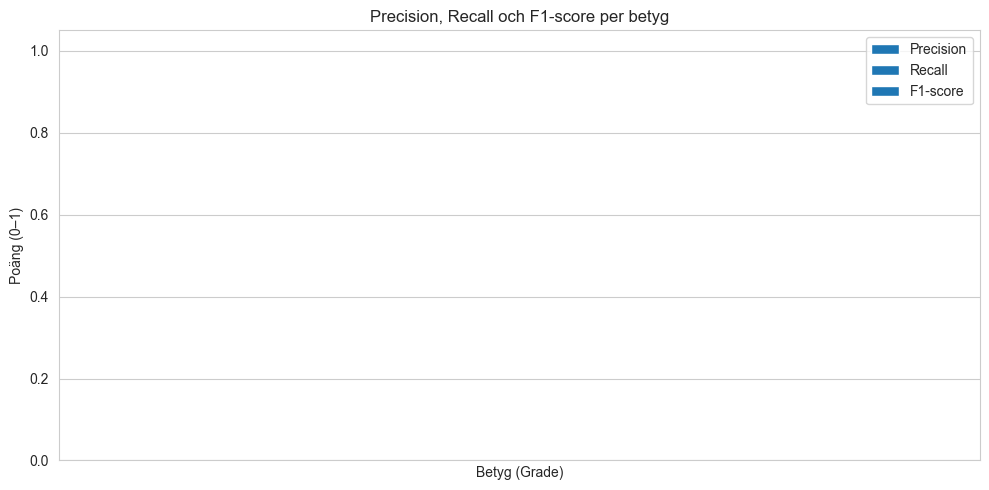

✅ Diagram sparat till: ../reports/grade_metrics_20251020_092832.png


In [40]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix

# === Create /reports folder ===
os.makedirs("../reports", exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === Generate classification report ===
print("📘 Klassificeringsrapport:")
report_dict = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

# === Save classification report ===
report_path = f"../reports/classification_report_{timestamp}.csv"
report_df.to_csv(report_path, index=True)
print(f"✅ Klassificeringsrapport sparad till: {report_path}")

# === Confusion matrices ===
valid_labels = sorted(list(set(y_val) | set(y_pred)))
cm_raw = confusion_matrix(y_val, y_pred, labels=valid_labels)
cm_norm = confusion_matrix(y_val, y_pred, labels=valid_labels, normalize="true")

# --- Plot 1: Raw & Normalized Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[0])
axes[0].set_title("Konfusionsmatris (antal)")
axes[0].set_xlabel("Predikterat")
axes[0].set_ylabel("Faktiskt")

sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=valid_labels, yticklabels=valid_labels, ax=axes[1])
axes[1].set_title("Konfusionsmatris (andel per klass)")
axes[1].set_xlabel("Predikterat")
axes[1].set_ylabel("Faktiskt")

plt.tight_layout()
cm_path = f"../reports/confusion_matrices_{timestamp}.png"
plt.savefig(cm_path, dpi=300)
plt.show()
print(f"✅ Konfusionsmatriser sparade till: {cm_path}")

# --- Plot 2: Precision, Recall, F1 per Grade ---
metrics_df = report_df.reset_index()
metrics_df = metrics_df[metrics_df['index'].isin(valid_labels)]

plt.figure(figsize=(10, 5))
bar_width = 0.25
x = np.arange(len(metrics_df))

plt.bar(x - bar_width, metrics_df["precision"], width=bar_width, label="Precision", color="skyblue")
plt.bar(x, metrics_df["recall"], width=bar_width, label="Recall", color="lightgreen")
plt.bar(x + bar_width, metrics_df["f1-score"], width=bar_width, label="F1-score", color="salmon")

plt.xticks(x, metrics_df["index"])
plt.xlabel("Betyg (Grade)")
plt.ylabel("Poäng (0–1)")
plt.title("Precision, Recall och F1-score per betyg")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()

bars_path = f"../reports/grade_metrics_{timestamp}.png"
plt.savefig(bars_path, dpi=300)
plt.show()
print(f"✅ Diagram sparat till: {bars_path}")


Se vilka faktorer som påverkar mest (Feature Importance)

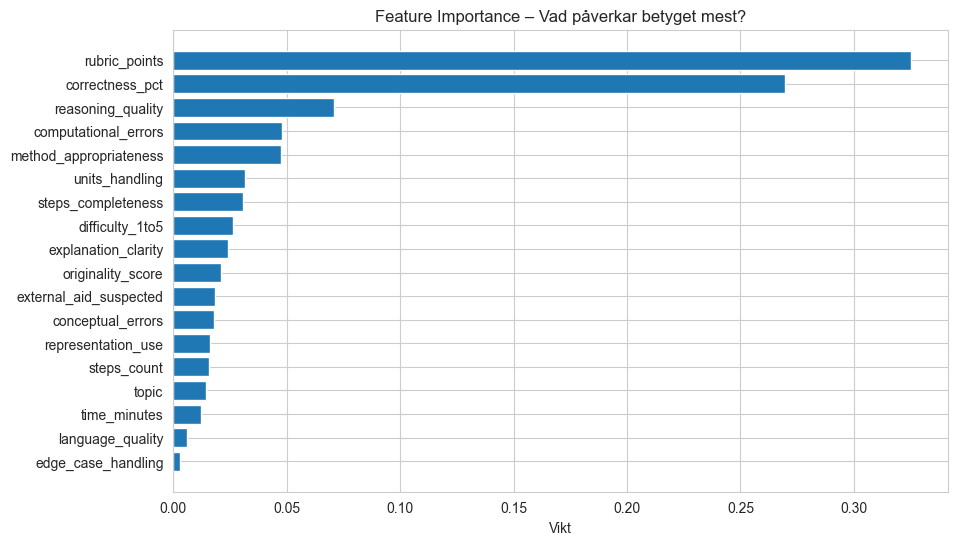

In [41]:
import numpy as np

importance = model.feature_importances_
features = X.columns

sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], importance[sorted_idx])
plt.title("Feature Importance – Vad påverkar betyget mest?")
plt.xlabel("Vikt")
plt.show()

Spara modellen (för backend-användning)

In [42]:
import joblib
joblib.dump(model, "../src/trained_grade_model.pkl")
print("✅ Modell sparad!")

✅ Modell sparad!
